**From section 2.2.2**

This post addresses section 2.2.2 of chapter 2 'Classifying patterns' from the book The Essence of Neural Networks. Here we plot squared error against weights. Assume that network has single layer, single unit, two inputs. Also assume that it has no bias input to the unit. We will use linear unit as mentioned in section 2.2.2 .

In [42]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm # Colormaps
from mpl_toolkits.mplot3d import Axes3D

# seed random numbers to make calculation deterministic
np.random.seed(1)

Consider that we have 25 patterns sampled from a uniform distribution between $0$ and $1$. This forms our input vector. Note that we have one unit that takes two inputs $x_1$ and $x_2$, and our input vector $X$ contains values for these two units.

In [43]:
X = np.random.uniform(0, 1, (25, 2))
print("Input data shape:{}".format(X.shape))

Input data shape:(25, 2)


Consider that $target$ vector is some function of input vector $X$ and some Gaussian noise. For random samples from a Gaussian distribution with specific mean and variance, i.e., $\mathcal{N}(\mu, \ \sigma^2)$, one can use: $\sigma \cdot \mathcal{N}(0, 1) + \mu$.

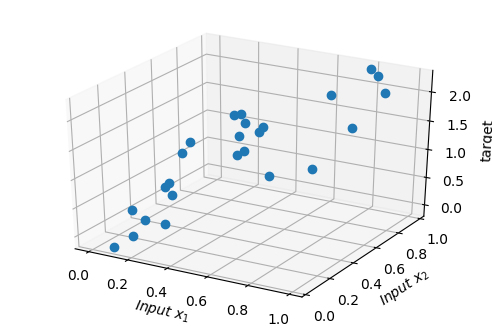

In [44]:
# function of input vector
f = 1.5*(X[:, 0] + X[:, 1])
# Gaussian noise mean and variance
noise_mu = 0
noise_variance = 0.25
noise = np.random.randn(1) * math.sqrt(noise_variance) + noise_mu
# target vector is a function of input vector and some Gaussian noise
target = f + noise

# Plot the input vector X vs target
fig = plt.figure(dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.plot(X[:,0], X[:,1], target, linestyle="None", marker="o")
ax.set_xlabel('$Input \ x_1$')
ax.set_ylabel('$Input \ x_2$')
ax.set_zlabel('target')

plt.show()

Our _target_ vector is the desired output. We approximate (as much as possible) to the _target_ output by optimizing the weights impinging on input connected to the unit. We calculate the squared error between _target_ output and the actual output and then update the weights in order to reduce this error. This error function is also called cost function or loss function.

If $t_j$ denotes the _target_ or desired output from unit $j$ and $o_j$ the actual output, then the squared error $E_p$ for a pattern $p$ can be defined as: $E_p = \frac{1}{2}  \ \Sigma_{j} \ (t_j - o_j)^2$. The factor $\frac{1}{2}$ is there to simplify the derivative of error function. If a network has more than one inputs, overall error $E$ from all inputs to a unit in a layer can be calculated as: $E = \Sigma \ E_p$

As we want to plot squared error with respect to weights, we take a range of weight values monotonically increasing (or decreasing) and calculate squared error for each weight value. Why are we taking monotonically increasing (or decreasing) weights? The reason is that if we take random values then squared error will also be increasing or decreasing according to random weight values and we will have hard time knowing where the squared error is lowest. We will see that in between these weight values the squared error will reach its lowest points and then it will again starts increasing.) See below that our weight vector $W$ has two weights $w_1$ and $w_2$ for our inputs $x_1$ and $x_2$ respectively. We take 100 weight values for this plotting.

In [45]:
W = np.array([np.linspace(-2, 4, num=50), np.linspace(-2, 4, num=50)]).T  # weight vector
print("Weight matrix shape: {}".format(W.shape))

def nn_squared_errors(x, w, target):
    net = np.dot(x, w)
    squared_error = 0.5 * np.sum((target - net)**2)
    return squared_error

# for each weight value w1 and w2, calculate (x1.w1 + x2.w2) where 
# x1 and x2 are X[:, 0] and X[:, 1] respectively; for each network
# output, calculate squared error
squared_errors = [nn_squared_errors(X, w, target) for w in W]
print('Min squared error for above chosen weights:', np.amin(squared_errors))

Weight matrix shape: (50, 2)
Min squared error for above chosen weights: 0.310556621049


Min squared error on weights grid: 0.274


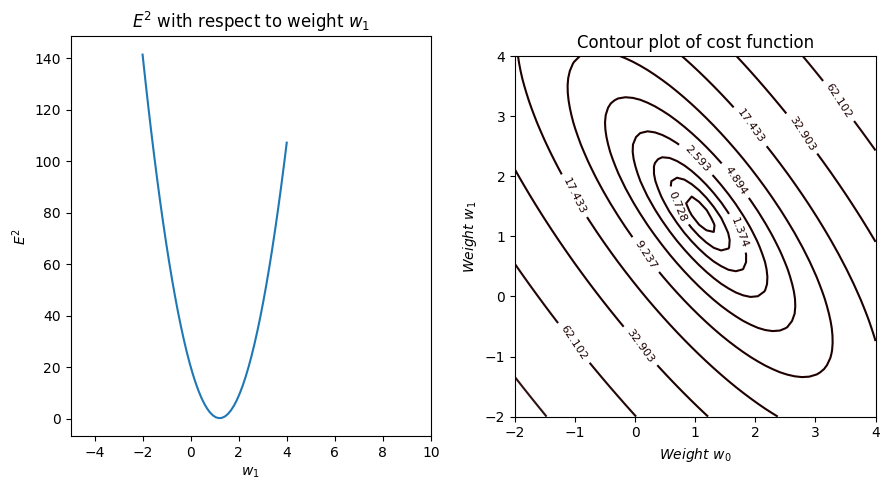

In [46]:
squared_error_vals = np.zeros(shape=(W[:, 0].size, W[:, 1].size))
for i, w1 in enumerate(W[:, 0]):
    for j, w2 in enumerate(W[:, 1]):
        w = np.array([w1, w2])
        squared_error = nn_squared_errors(X, w, target)
        squared_error_vals[i, j] = squared_error

print('Min squared error on weights grid: {:0.3f}'.format(np.amin(squared_error_vals)))

# plotting with respect to weight w1
fig = plt.figure(dpi=100, figsize=(9, 5)) # figsize w, h in inches
p1 = fig.add_subplot(121)
p1.plot(W[:, 0], squared_errors)
p1.set_xlabel('$w_1$')
p1.set_xlim(-5, 10)
p1.set_ylabel('$E^2$')
p1.set_title('$E^2$ with respect to weight $w_1$')

p2 = fig.add_subplot(122, aspect='equal')
cp = p2.contour(W[:,0], W[:, 1], squared_error_vals, np.logspace(-4, 4, 30), cmap=cm.pink)
p2.clabel(cp, inline=1, fontsize=8)
p2.set_title("Contour plot of cost function")
p2.set_xlabel("$Weight \ w_0$")
p2.set_ylabel("$Weight \ w_1$")

plt.tight_layout()
plt.show()

Now, lets create a surface plot for the weight combinations ($w_1$, $w_2$) and $E^2$ and then mark the point where cost (i.e., squared error) is lowest:

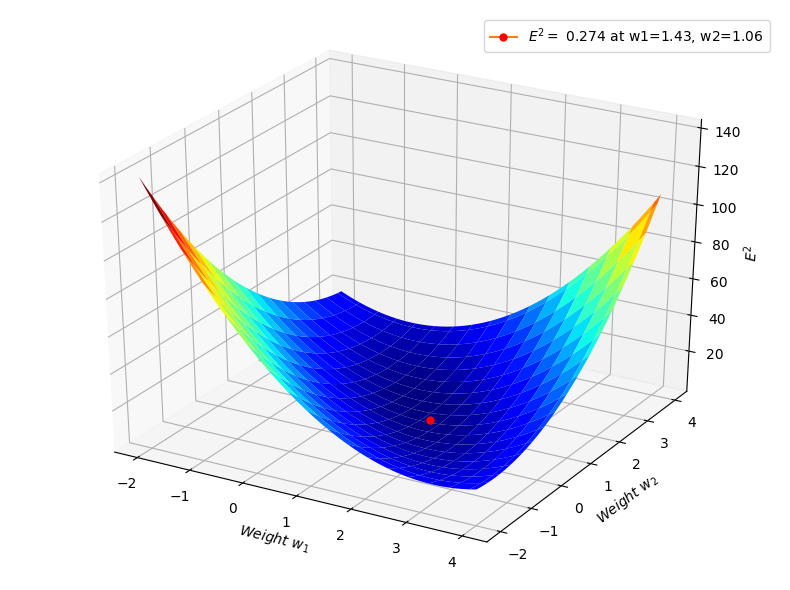

In [47]:
# Create a meshgrid of weights w1 and w2
W0, W1 = np.meshgrid(W[:, 0], W[:, 1])

# For combination of w1 and w2, calculate the cost function (i.e., squared error)
sq_errors = np.array([nn_squared_errors(X, w, target) for w in zip(np.ravel(W0), np.ravel(W1))])
# Convert 1D squared errors into 2D
sq_errors = sq_errors.reshape(W0.shape)
# Find row and column index where E^2 is lowest
lowest_i, lowest_j = np.unravel_index(sq_errors.argmin(), sq_errors.shape)

fig = plt.figure(dpi=100, figsize=(8, 6))
p1 = fig.add_subplot(111, projection='3d')
p1.plot_surface(W0, W1, squared_error_vals, cmap=cm.jet, rstride=3, cstride=3)
p1.set_xlabel('$Weight \ w_1$')
p1.set_ylabel('$Weight \ w_2$')
p1.set_zlabel('$E^2$')

p1.plot([W0[lowest_i, lowest_j]], [W1[lowest_i, lowest_j]], [sq_errors[lowest_i, lowest_j]], \
        label='$E^2=$ {:0.3f} at w1={:0.2f}, w2={:0.2f}'.format(sq_errors[lowest_i, lowest_j], W0[lowest_i, lowest_j], W1[lowest_i, lowest_j]), \
        markerfacecolor='r', markeredgecolor='r', marker='o', markersize=5);ll
p1.legend()

plt.tight_layout()
plt.show()